In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/water_potability.csv')

## Анализ датасета

In [9]:
df.shape

(3276, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
from utils import get_df_info
        
get_df_info(df)


Столбец ph (тип float64) имеет 491 пропусков из 3276 значений, 14.987789987789988% (индекс 0)

Столбец Hardness (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 1)

Столбец Solids (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 2)

Столбец Chloramines (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 3)

Столбец Sulfate (тип float64) имеет 781 пропусков из 3276 значений, 23.84004884004884% (индекс 4)

Столбец Conductivity (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 5)

Столбец Organic_carbon (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 6)

Столбец Trihalomethanes (тип float64) имеет 162 пропусков из 3276 значений, 4.945054945054945% (индекс 7)

Столбец Turbidity (тип float64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 8)

Столбец Potability (тип int64) имеет 0 пропусков из 3276 значений, 0.0% (индекс 9)


In [12]:
df.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Как видно, в данном датасете есть 3 столбца с пустыми значениями. Столбец "Sulfate" трогать нет смысла, т.к. количество пропусков составляет почти 25%, и таким образом после 'лёгкой' обработки данные сильно исказятся. Попробуем обработать пропуски в столбцах "ph" и "Trihalomethanes".

## Обработка пропусков

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [14]:
import math

def get_values_info(df: pd.DataFrame, column_name: str, lines: int = 10):
    value_count_list = list()
    print("Для датафрейма, столбец {0}:".format(column_name))
    sum = 0
    unique_count = 0
    
    # Формируем список из кортежей
    for value in df[column_name].unique():
        unique_count = unique_count + 1
        if (isinstance(value, float) and math.isnan(value)):
            temp = df[pd.isna(df[column_name])]
        else:
            temp = df[df[column_name] == value]
            sum = sum + temp.shape[0]
        
        value_count_list.append((value, temp.shape[0]))
        
    # Сортируем по убыванию на основе второго поля кортежа
    value_count_list = sorted(value_count_list, reverse = True, key = lambda x: x[1])
    
    line = 0
    # Смотрим на результат
    for element in value_count_list:
        if line == lines: 
            break
        line += 1
        print(element[0], "->", element[1])
        
    print("Заполненных значений:", sum, "(из {})".format(df.shape[0]))
    print("Уникальных значений:", unique_count)


In [15]:
def column_imputer(df: pd.DataFrame, column_name, strategy_name):   
    column = df[[column_name]]
    mask = MissingIndicator().fit_transform(column)
    imputer = SimpleImputer(strategy = strategy_name)
    column_imputed = imputer.fit_transform(column)
    
    return column_imputed

<AxesSubplot:xlabel='ph', ylabel='Count'>

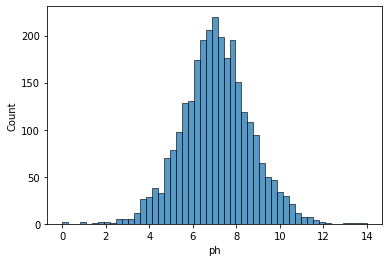

In [16]:
sns.histplot(df['ph'])

In [17]:
get_values_info(df, 'ph')

Для датафрейма, столбец ph:
nan -> 491
3.71608007538699 -> 1
8.099124189298397 -> 1
8.316765884214679 -> 1
9.092223456290965 -> 1
5.584086638456089 -> 1
10.223862164528772 -> 1
8.635848718500734 -> 1
11.180284470721592 -> 1
7.360640105838258 -> 1
Заполненных значений: 2785 (из 3276)
Уникальных значений: 2786


Для датафрейма, столбец ph:
7.080794504276835 -> 491
3.71608007538699 -> 1
8.099124189298397 -> 1
8.316765884214679 -> 1
9.092223456290965 -> 1
5.584086638456089 -> 1
10.223862164528772 -> 1
8.635848718500734 -> 1
11.180284470721592 -> 1
7.360640105838258 -> 1
Заполненных значений: 3276 (из 3276)
Уникальных значений: 2786


<AxesSubplot:xlabel='ph', ylabel='Count'>

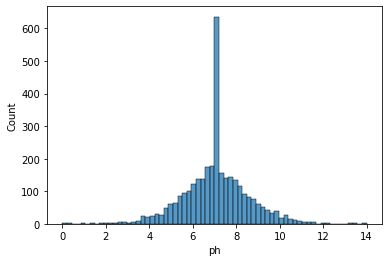

In [18]:
mean_df = df.copy()
mean_ph = column_imputer(mean_df, "ph", "mean")
mean_df["ph"] = mean_ph

get_values_info(mean_df, "ph")
sns.histplot(mean_df["ph"])

Для датафрейма, столбец ph:
7.036752103833548 -> 492
3.71608007538699 -> 1
8.099124189298397 -> 1
8.316765884214679 -> 1
9.092223456290965 -> 1
5.584086638456089 -> 1
10.223862164528772 -> 1
8.635848718500734 -> 1
11.180284470721592 -> 1
7.360640105838258 -> 1
Заполненных значений: 3276 (из 3276)
Уникальных значений: 2785


<AxesSubplot:xlabel='ph', ylabel='Count'>

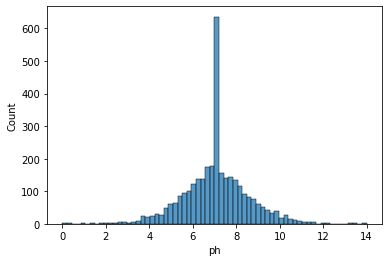

In [19]:
median_df = df.copy()
median_ph = column_imputer(median_df, "ph", "median")
median_df["ph"] = median_ph

get_values_info(median_df, "ph")
sns.histplot(median_df["ph"])

Для датафрейма, столбец ph:
0.0 -> 492
3.71608007538699 -> 1
8.099124189298397 -> 1
8.316765884214679 -> 1
9.092223456290965 -> 1
5.584086638456089 -> 1
10.223862164528772 -> 1
8.635848718500734 -> 1
11.180284470721592 -> 1
7.360640105838258 -> 1
Заполненных значений: 3276 (из 3276)
Уникальных значений: 2785


<AxesSubplot:xlabel='ph', ylabel='Count'>

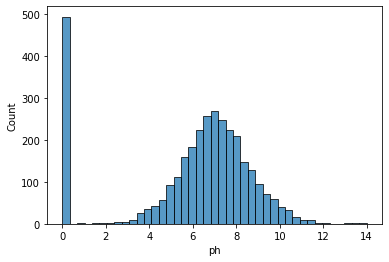

In [20]:
most_frequent_df = df.copy()
most_frequent_ph = column_imputer(most_frequent_df, "ph", "most_frequent")
most_frequent_df["ph"] = most_frequent_ph

get_values_info(most_frequent_df, "ph")
sns.histplot(most_frequent_df["ph"])

Простая импьютация в данном случае сильно искажает данные, а заполнение нулями и вовсе даёт абсолютно неправильную статистику.

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

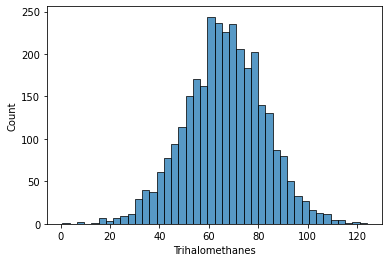

In [21]:
tr = 'Trihalomethanes'
sns.histplot(df[tr])

In [22]:
get_values_info(df, tr)

Для датафрейма, столбец Trihalomethanes:
nan -> 162
86.9909704615088 -> 1
56.32907628451764 -> 1
66.42009251176368 -> 1
100.34167436508008 -> 1
31.997992727424737 -> 1
54.91786184199447 -> 1
84.60355617402357 -> 1
62.79830896292516 -> 1
53.92884576751224 -> 1
Заполненных значений: 3114 (из 3276)
Уникальных значений: 3115


Для датафрейма, столбец Trihalomethanes:
66.39629294676803 -> 162
86.9909704615088 -> 1
56.32907628451764 -> 1
66.42009251176368 -> 1
100.34167436508008 -> 1
31.997992727424737 -> 1
54.91786184199447 -> 1
84.60355617402357 -> 1
62.79830896292516 -> 1
53.92884576751224 -> 1
Заполненных значений: 3276 (из 3276)
Уникальных значений: 3115


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

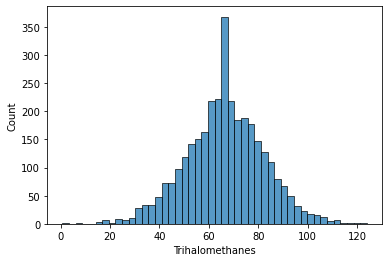

In [23]:
mean_df = df.copy()
mean_tr = column_imputer(mean_df, tr, "mean")
mean_df[tr] = mean_tr

get_values_info(mean_df, tr)
sns.histplot(mean_df[tr])

Для данного столбца график после импьютации исказился меньше, но все равно изменился значительно.

## Масштабирование

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['ph']])

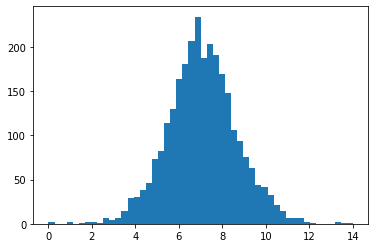

In [26]:
plt.hist(df['ph'], 50)
plt.show()

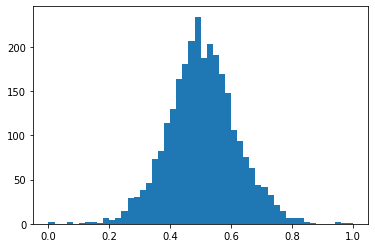

In [27]:
plt.hist(sc1_data, 50)
plt.show()